In [1]:
!pip install numpy
!pip install pandas
!pip install geopandas
!pip install matplotlib
!pip install seaborn
!pip install sqlite3

You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\DataCleaning\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\DataCleaning\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\DataCleaning\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\DataCleaning\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\DataCleaning\myenv\Scripts\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\DataCleaning\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
#Change directory to where olist.db stored
os.chdir("C:/Users/asus/Documents/Phyton/Pacmann/DataCleaning")

In [3]:
#Establish connection to database olist
conn = sqlite3.connect('olist.db')
cursor = conn.cursor()

In [4]:
#Define Objectives
#1. Top 3 product per zip codes
#2. Top 10 customers with most transaction
#3. customer histogram based on puchase date intervals

#Phase 1 :Data Inspections
def inspect(dataframe):
    print("Number of row and column :")
    print(dataframe.shape)
    print("\n")
    
    print("Dataset Structure :")
    print(dataframe.head())
    print("\n")
    
    print("Datatypes of each column :")
    print(dataframe.dtypes)
    print("\n")

def inspect_stat(dataframe):
    print("statistical summary :")
    print(dataframe.describe())
    print("\n")
    
    print("missing value per column :")
    print(dataframe.isnull().sum())
    print("\n")
    
    print("missing value percentage per column :")
    print((dataframe.isnull().sum() / len(dataframe)) * 100)
    print("\n")

def inspect_freq(dataframe, category):
    print("distribution frequency for each category")
    print(dataframe[category].value_counts())
    #dataframe[category].value_counts().plot(kind='bar')
    #plt.title(f"Barchart of {category}")
    #plt.show()
    print("\n")
    
def inspect_unique(dataframe, category):
    print(f"number of unique value of column {category} :")
    print(dataframe[category].nunique())
    print("\n")
    
def fill_nulls(dataframe, category, value):
    if value == 'mode':
        mode = dataframe[category].mode()[0]
        dataframe[category] = dataframe[category].fillna(mode)
    return dataframe

In [6]:
#Data Cleaning
#Assign needed tables to respective dataframe
query = "SELECT * FROM olist_sellers_dataset;"
sellers_df = pd.read_sql_query(query, conn)

inspect(sellers_df)
inspect_stat(sellers_df)
inspect_freq(sellers_df,"seller_city")

Number of row and column :
(3095, 5)


Dataset Structure :
   index                         seller_id  seller_zip_code_prefix  \
0      0  3442f8959a84dea7ee197c632cb2df15                   13023   
1      1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2      2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3      3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4      4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  


Datatypes of each column :
index                      int64
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object


statistical summary :
             index  seller_zip_code_prefix
count  3095.000000           

In [7]:
query = "SELECT * FROM olist_order_items_dataset;"
order_items_df = pd.read_sql_query(query, conn)

inspect(order_items_df)
inspect_stat(order_items_df)

Number of row and column :
(112650, 8)


Dataset Structure :
   index                          order_id  order_item_id  \
0      0  00010242fe8c5a6d1ba2dd792cb16214              1   
1      1  00018f77f2f0320c557190d7a144bdd3              1   
2      2  000229ec398224ef6ca0657da4fc703e              1   
3      3  00024acbcdf0a6daa1e931b038114c75              1   
4      4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90       

In [8]:
query = "SELECT * FROM olist_products_dataset;"
products_df = pd.read_sql_query(query, conn)

inspect(products_df)
inspect_stat(products_df)
inspect_freq(products_df,"product_category_name")
inspect_unique(products_df,"product_category_name")
inspect_unique(products_df,"product_id")

Number of row and column :
(32951, 10)


Dataset Structure :
   index                        product_id  product_category_name  \
0      0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1      1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2      2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3      3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4      4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0

In [9]:
#cleaning null values of product_dataset
products_df = fill_nulls(products_df,'product_category_name','mode')
inspect_stat(products_df)

statistical summary :
              index  product_name_lenght  product_description_lenght  \
count  32951.000000         32341.000000                32341.000000   
mean   16475.000000            48.476949                  771.495285   
std     9512.278697            10.245741                  635.115225   
min        0.000000             5.000000                    4.000000   
25%     8237.500000            42.000000                  339.000000   
50%    16475.000000            51.000000                  595.000000   
75%    24712.500000            57.000000                  972.000000   
max    32950.000000            76.000000                 3992.000000   

       product_photos_qty  product_weight_g  product_length_cm  \
count        32341.000000      32949.000000       32949.000000   
mean             2.188986       2276.472488          30.815078   
std              1.736766       4282.038731          16.914458   
min              1.000000          0.000000           7.000000   

In [10]:
#simplify dataframe
column_to_drop = ['index','seller_state']
sellers_df.drop(sellers_df[column_to_drop], axis = 1, inplace=True)
column_to_drop = ['index','order_id','order_item_id','shipping_limit_date','price','freight_value']
order_items_df.drop(order_items_df[column_to_drop], axis=1, inplace=True)
column_to_drop = ['index','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g',
                  'product_length_cm','product_height_cm','product_width_cm']
products_df.drop(products_df[column_to_drop], axis=1, inplace=True)

In [11]:
#merge objective1 dataframe
obj1_df = pd.merge(order_items_df,sellers_df, on='seller_id', how='left')
obj1_df = pd.merge(obj1_df,products_df, on='product_id', how='left')
obj1_df

,product_id,seller_id,seller_zip_code_prefix,seller_city,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,cool_stuff
1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,pet_shop
2,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,moveis_decoracao
3,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,14403,franca,perfumaria
4,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,87900,loanda,ferramentas_jardim
...,...,...,...,...,...
112645,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,utilidades_domesticas
112646,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1206,sao paulo,informatica_acessorios
112647,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,80610,curitiba,esporte_lazer
112648,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,4733,sao paulo,informatica_acessorios


In [12]:
# drop dupliclates before aggregating counts
obj1_df.drop_duplicates()

,product_id,seller_id,seller_zip_code_prefix,seller_city,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,cool_stuff
1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,pet_shop
2,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,moveis_decoracao
3,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,14403,franca,perfumaria
4,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,87900,loanda,ferramentas_jardim
...,...,...,...,...,...
112613,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,99730,jacutinga,ferramentas_jardim
112619,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,80330,curitiba,moveis_decoracao
112632,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,6429,barueri,relogios_presentes
112637,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,5141,pirituba,esporte_lazer


In [13]:
#display top3 product
#group_keys false to disable hierarchical indexing, since groupby uses 2 column (2 dimensional)
obj1_aggr = obj1_df.groupby(['seller_zip_code_prefix','product_category_name']).size().groupby('seller_zip_code_prefix', group_keys=False).nlargest(3).reset_index(name='frequency')
obj1_aggr

,seller_zip_code_prefix,product_category_name,frequency
0,1001,fashion_bolsas_e_acessorios,19
1,1021,cool_stuff,19
2,1021,telefonia,7
3,1021,eletronicos,6
4,1022,artes,5
...,...,...,...
4291,99670,construcao_ferramentas_seguranca,1
4292,99700,cool_stuff,2
4293,99730,ferramentas_jardim,6
4294,99730,construcao_ferramentas_jardim,4


In [14]:
#it's quite hard to visualize the data using a map. since the zip code provide was prefix.
#internet reference said brazilian zipcodes was formatted xxxxx-xxx. so the prefix should have been 5 digit,
#but the data has 4 digit prefix zipcodes. unsure if the data is correct or not.
#1st objective is shifted to analyze most common product in top 3 that is commonly found across all sub regions
unique_count = obj1_aggr['product_category_name'].nunique()
unique_count


71

In [21]:
#there is 71 unique product category across 4296 records
top_product_counts = obj1_aggr.groupby('product_category_name')['frequency'].sum().sort_values(ascending=False).head(3)
top_product_counts
#RESULTS
#across all region 3 most common purchased product category is
#(cama_mesa_banho, beleza_saude and esporte_lazer)

product_category_name
cama_mesa_banho    12411
beleza_saude        9134
esporte_lazer       8217
Name: frequency, dtype: int64

In [5]:
#Objective 2
#2. Top 10 customers with most transaction
#assign order_customer, orders, and order_payments
query = 'SELECT * FROM olist_order_customer_dataset;'
order_customer_df = pd.read_sql_query(query,conn)

inspect(order_customer_df)
inspect_stat(order_customer_df)
order_customer_df['customer_unique_id'].nunique()

Number of row and column :
(99441, 6)


Dataset Structure :
   index                       customer_id                customer_unique_id  \
0      0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


Datatypes of each column :
index                 

96096

In [6]:
#Data customer disamarkan karena privasi, objectif2 akan dilakukan berdasar customer id
#untuk tabel ini akan dipakai kolom customer_unique_id, dan customer_city, serta customer_id sebagai penghubung ke tabel order
#kolom zipcode lebih baik berupa data object, namun karena tak kita pakai kita biarkan
#terdapat 96096 customer unik di 99441 record
query = 'SELECT * FROM olist_order_dataset;'
order_df = pd.read_sql_query(query,conn)

inspect(order_df)
inspect_stat(order_df)

Number of row and column :
(99441, 9)


Dataset Structure :
   index                          order_id                       customer_id  \
0      0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0         

In [7]:
#sebagai tabel penghubung kita membutuhkan kolom order_id, customer_id
query = 'SELECT * FROM olist_order_payments_dataset;'
order_payments_df = pd.read_sql_query(query,conn)

inspect(order_payments_df)
inspect_stat(order_payments_df)

Number of row and column :
(103886, 6)


Dataset Structure :
   index                          order_id  payment_sequential payment_type  \
0      0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1      1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2      2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3      3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4      4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


Datatypes of each column :
index                     int64
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float

In [8]:
#untuk objektif2 tabel order payments tak dibutuhkan
#jumlah order per customer dapat dilakukan langsung di tabel order 
#sebagai peragaan pengolahan data tanggal, digunakan order_purchase_timestamp dari tabel order...
#... sebagai tambahan syarat dalam proses perhitungan berapa order yang dilakukan per customer
#kita akan hitung transaksi yang dilakukan kustomer antara jam 10 - 11 am, berasumsi ada sale di jam itu setiap hari
order_df['purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
filtered_df = order_df[(order_df['purchase_timestamp'].dt.hour==10) & 
            (order_df['purchase_timestamp'].dt.minute >= 0) &
            (order_df['purchase_timestamp'].dt.minute <= 59)]
filtered_df


,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_timestamp
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33
12,12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,2018-06-07 10:06:19
55,55,40c5e18f7d112b59b3e5113a59a905b3,67407057a7d5ee17d1cd09523f484d13,delivered,2018-06-11 10:25:52,2018-06-11 10:58:32,2018-06-14 13:03:00,2018-06-19 00:31:13,2018-07-16 00:00:00,2018-06-11 10:25:52
72,72,6abaad69b8b349c3a529b4b91ce18e46,f5618502bee8eafdee72fb6955e2ebdf,delivered,2018-02-15 10:33:30,2018-02-15 10:47:59,2018-02-20 14:15:09,2018-02-24 19:15:56,2018-03-07 00:00:00,2018-02-15 10:33:30
118,118,01a75ac3dd000b7628a684be97c29234,57ee2ef64f17a5f9a4bf30489b06326c,delivered,2018-01-23 10:32:39,2018-01-23 10:59:10,2018-01-26 19:12:26,2018-02-07 14:59:03,2018-02-21 00:00:00,2018-01-23 10:32:39
...,...,...,...,...,...,...,...,...,...,...
99381,99381,97369eeb115806c27ee2054105eabe97,35647e39316747b2bb470dc93ddb67aa,delivered,2018-05-31 10:45:36,2018-05-31 10:55:10,2018-06-01 15:27:00,2018-06-04 20:10:57,2018-07-04 00:00:00,2018-05-31 10:45:36
99391,99391,e8455c3c0bc5471436a335a0de392761,3a4562b466aea32a6aa09fe85e67d400,delivered,2018-02-13 10:42:15,2018-02-15 03:47:45,2018-02-21 20:33:20,2018-03-02 00:28:57,2018-03-09 00:00:00,2018-02-13 10:42:15
99404,99404,a2a701c6f01ddffde8a1bde136ed7d4a,8543703cb2bc95c3606af4af727d604f,delivered,2017-11-26 10:26:55,2017-11-26 10:36:06,2017-11-27 22:49:48,2017-12-16 02:54:56,2018-01-03 00:00:00,2017-11-26 10:26:55
99407,99407,c2af225ac9a68a3c24500aa6fab006aa,f93c9e539a9705a57902c625b611e90c,delivered,2018-08-20 10:04:30,2018-08-20 14:53:46,2018-08-22 13:16:00,2018-08-27 21:44:45,2018-08-28 00:00:00,2018-08-20 10:04:30


In [9]:
#simplify dataframe prior to merge
column_to_drop = ['index','customer_zip_code_prefix','customer_state']
order_customer_df.drop(order_customer_df[column_to_drop], axis=1, inplace=True)
column_to_keep = ['order_id','customer_id','purchase_timestamp']
filtered_df = filtered_df.loc[:,column_to_keep]


In [10]:
#merge objective2 dataframe
obj2_df = pd.merge(filtered_df, order_customer_df, on='customer_id',how = 'left')
obj2_df

,order_id,customer_id,purchase_timestamp,customer_unique_id,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo
1,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,2018-06-07 10:06:19,e97109680b052ee858d93a539597bba7,ouro preto
2,40c5e18f7d112b59b3e5113a59a905b3,67407057a7d5ee17d1cd09523f484d13,2018-06-11 10:25:52,7cfba6e55439cae3fd2479d62fafe67f,rio de janeiro
3,6abaad69b8b349c3a529b4b91ce18e46,f5618502bee8eafdee72fb6955e2ebdf,2018-02-15 10:33:30,fa0ee7ceb94193fb02aa78ce3a55695a,carapicuiba
4,01a75ac3dd000b7628a684be97c29234,57ee2ef64f17a5f9a4bf30489b06326c,2018-01-23 10:32:39,91a7366b39d3620ce44f85fa5d116896,niteroi
...,...,...,...,...,...
6172,97369eeb115806c27ee2054105eabe97,35647e39316747b2bb470dc93ddb67aa,2018-05-31 10:45:36,7859a40482024a3d00041c4ca1434298,sao paulo
6173,e8455c3c0bc5471436a335a0de392761,3a4562b466aea32a6aa09fe85e67d400,2018-02-13 10:42:15,2b87be21b33759b689e969cb8fcb9d0b,curitiba
6174,a2a701c6f01ddffde8a1bde136ed7d4a,8543703cb2bc95c3606af4af727d604f,2017-11-26 10:26:55,21ad443c5dd9c2d257fd514ec411d183,belem
6175,c2af225ac9a68a3c24500aa6fab006aa,f93c9e539a9705a57902c625b611e90c,2018-08-20 10:04:30,a3adfb1ef257529c6abe81be7726a63f,sao paulo


In [11]:
#dropping duplicates
obj2_df.drop_duplicates()

,order_id,customer_id,purchase_timestamp,customer_unique_id,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo
1,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,2018-06-07 10:06:19,e97109680b052ee858d93a539597bba7,ouro preto
2,40c5e18f7d112b59b3e5113a59a905b3,67407057a7d5ee17d1cd09523f484d13,2018-06-11 10:25:52,7cfba6e55439cae3fd2479d62fafe67f,rio de janeiro
3,6abaad69b8b349c3a529b4b91ce18e46,f5618502bee8eafdee72fb6955e2ebdf,2018-02-15 10:33:30,fa0ee7ceb94193fb02aa78ce3a55695a,carapicuiba
4,01a75ac3dd000b7628a684be97c29234,57ee2ef64f17a5f9a4bf30489b06326c,2018-01-23 10:32:39,91a7366b39d3620ce44f85fa5d116896,niteroi
...,...,...,...,...,...
6172,97369eeb115806c27ee2054105eabe97,35647e39316747b2bb470dc93ddb67aa,2018-05-31 10:45:36,7859a40482024a3d00041c4ca1434298,sao paulo
6173,e8455c3c0bc5471436a335a0de392761,3a4562b466aea32a6aa09fe85e67d400,2018-02-13 10:42:15,2b87be21b33759b689e969cb8fcb9d0b,curitiba
6174,a2a701c6f01ddffde8a1bde136ed7d4a,8543703cb2bc95c3606af4af727d604f,2017-11-26 10:26:55,21ad443c5dd9c2d257fd514ec411d183,belem
6175,c2af225ac9a68a3c24500aa6fab006aa,f93c9e539a9705a57902c625b611e90c,2018-08-20 10:04:30,a3adfb1ef257529c6abe81be7726a63f,sao paulo


In [12]:
#notetoself : .size() includes null, .count() excludes null
# in this df there were no nulls
#notetoself : without .resetindex() i will get hierarchical index(), by using more than 1 column in groupby parameter
#hierarchichal index impact subsequent merge operation on resulting df. visualization also favors flat df
#i only need to keep hierarchical index if i intend to perform group specific calculation
customer_purchases_count_df = obj2_df.groupby('customer_unique_id').size().reset_index(name='counts').sort_values(by='counts',ascending=False).head(10)
#i tried it with .count() but it will not reproduce new column where count values should be located
customer_purchases_count_df

,customer_unique_id,counts
1496,3e43e6105506432c953e165fb2acf44c,4
2384,64df076fb557552498049bb07ed1cd5f,3
4262,b2bd387fdc3cf05931f0f897d607dc88,3
2676,719b758d12e3c1f243c66bf47b488be1,2
2924,7bff4fff725edd40fde6f0ac1eb0e2dc,2
2414,665f8bbe2cf428657aeb0572c27fef58,2
4688,c5b58e89d4e287e453b4a0bffcf7a025,2
4853,cc14ea7099959d91a17c9d7c3a46721d,2
2937,7c588c097689b0b77fd73d171332b0ba,2
1839,4e3b6c25502ef69e5c5e54616bf67ed7,2


In [13]:
#pendekatan lain menambahkan kolom asal city kustomer
customer_purchase_count = obj2_df.groupby('customer_unique_id').agg({'customer_city' : 'first', 'customer_id' : 'size'}).reset_index()
customer_purchase_count.rename(columns={'customer_id' : 'counts'}, inplace=True)
customer_purchase_count = customer_purchase_count.sort_values(by='counts', ascending=False).head(10)
customer_purchase_count

,customer_unique_id,customer_city,counts
1496,3e43e6105506432c953e165fb2acf44c,praia grande,4
2384,64df076fb557552498049bb07ed1cd5f,rio de janeiro,3
4262,b2bd387fdc3cf05931f0f897d607dc88,ribeirao preto,3
2676,719b758d12e3c1f243c66bf47b488be1,sao paulo,2
2924,7bff4fff725edd40fde6f0ac1eb0e2dc,rio de janeiro,2
2414,665f8bbe2cf428657aeb0572c27fef58,piracicaba,2
4688,c5b58e89d4e287e453b4a0bffcf7a025,cravinhos,2
4853,cc14ea7099959d91a17c9d7c3a46721d,linhares,2
2937,7c588c097689b0b77fd73d171332b0ba,sao paulo,2
1839,4e3b6c25502ef69e5c5e54616bf67ed7,sao paulo,2


In [14]:
#objective3 : customer histogram based on purchase date intervals
#i kinda confuse with this objective i myself made.
#so objective is to detect if a customer buys more than one time in olist shop
#if they are, display the day difference distribution
#first, we merge two needed tables
obj3_df = pd.merge(order_df,order_customer_df, on='customer_id', how = 'left')
#second, we simplify to column we need
column_to_keep = ['customer_unique_id','order_purchase_timestamp']
obj3_df = obj3_df.loc[:,column_to_keep]
# third, drop duplicates if any
obj3_df.drop_duplicates()
obj3_df


,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39
...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05
99437,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58
99438,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43
99439,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27


In [15]:
#fourth, we filter to records where customer unique id appear more than one
#reset index to create new index column, drop=True to dispose index coming from obj3_df dataframe
filtered_df2 = obj3_df.groupby('customer_unique_id').filter(lambda x: len(x)>1).reset_index(drop=True)
filtered_df2

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,ccafc1c3f270410521c3c6f3b249870f,2018-06-07 19:03:12
2,6e26bbeaa107ec34112c64e1ee31c0f5,2018-01-02 19:00:43
3,08fb46d35bb3ab4037202c23592d1259,2018-06-04 16:44:48
4,c2551ea089b7ebbc67a2ea8757152514,2017-05-14 20:28:25
...,...,...
6337,62b8761192c86f4ead06f4a433096a2b,2018-05-07 09:01:58
6338,dca9a13536adcef18c6c5859487347b1,2018-03-17 12:52:37
6339,d05c44a138277ad325d915c6b7ccbcdf,2018-09-06 18:45:47
6340,39fff7cb5873a7116b02234bd1e6c6dc,2017-10-02 08:45:35


In [16]:
#convert purchase timestamp to datetime
filtered_df2['order_purchase_timestamp'] = pd.to_datetime(filtered_df2['order_purchase_timestamp'])
filtered_df2

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,ccafc1c3f270410521c3c6f3b249870f,2018-06-07 19:03:12
2,6e26bbeaa107ec34112c64e1ee31c0f5,2018-01-02 19:00:43
3,08fb46d35bb3ab4037202c23592d1259,2018-06-04 16:44:48
4,c2551ea089b7ebbc67a2ea8757152514,2017-05-14 20:28:25
...,...,...
6337,62b8761192c86f4ead06f4a433096a2b,2018-05-07 09:01:58
6338,dca9a13536adcef18c6c5859487347b1,2018-03-17 12:52:37
6339,d05c44a138277ad325d915c6b7ccbcdf,2018-09-06 18:45:47
6340,39fff7cb5873a7116b02234bd1e6c6dc,2017-10-02 08:45:35


In [20]:
#define function to calculate difference between two dates for each group
#the difference is between date record n and record n+1 for each group
#the difference is calculated using days unit
#shift(1) means next record
#dropna to exclude null from 1st record (latest datetime) in each group
def calculate_difference(group):
    sorted_dates = group.sort_values(ascending=True)
    differences = sorted_dates.diff().dt.days
    return differences

In [21]:
#trying sorting manually before applying function because getting NaN and negatives a lot in difference column
filtered_df2 = filtered_df2.sort_values(by = ['customer_unique_id','order_purchase_timestamp'], ascending=False)
filtered_df2

,customer_unique_id,order_purchase_timestamp,difference
2098,ffe254cc039740e17dd15a5305035928,2017-04-02 16:33:30,NaN
4351,ffe254cc039740e17dd15a5305035928,2017-04-02 16:33:30,0.0
2036,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-09-14 14:24:04,NaN
2257,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-08-23 13:15:29,-23.0
4662,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-02-22 12:26:42,-183.0
...,...,...,...
2801,004b45ec5c64187465168251cd1c9c2f,2017-09-01 12:11:23,-268.0
2555,004288347e5e88a27ded2bb23747066c,2018-01-14 07:36:54,NaN
2164,004288347e5e88a27ded2bb23747066c,2017-07-27 14:13:03,-171.0
2529,00172711b30d52eea8b313a7f2cced02,2018-08-13 09:14:07,NaN


In [22]:
#applying the function to each group
filtered_df2['difference'] = filtered_df2.groupby('customer_unique_id')['order_purchase_timestamp'].transform(calculate_difference)
filtered_df2

,customer_unique_id,order_purchase_timestamp,difference
2098,ffe254cc039740e17dd15a5305035928,2017-04-02 16:33:30,NaN
4351,ffe254cc039740e17dd15a5305035928,2017-04-02 16:33:30,0.0
2036,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-09-14 14:24:04,22.0
2257,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-08-23 13:15:29,182.0
4662,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-02-22 12:26:42,NaN
...,...,...,...
2801,004b45ec5c64187465168251cd1c9c2f,2017-09-01 12:11:23,NaN
2555,004288347e5e88a27ded2bb23747066c,2018-01-14 07:36:54,170.0
2164,004288347e5e88a27ded2bb23747066c,2017-07-27 14:13:03,NaN
2529,00172711b30d52eea8b313a7f2cced02,2018-08-13 09:14:07,16.0


In [24]:
#check difference column range
filtered_df2['difference'].max()

608.0

In [25]:
#removing NaN and zero values
daysinterval_df = filtered_df2[filtered_df2['difference'].notna() & (filtered_df2['difference'] >= 1)]
daysinterval_df

,customer_unique_id,order_purchase_timestamp,difference
2036,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-09-14 14:24:04,22.0
2257,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-08-23 13:15:29,182.0
4411,ff8892f7c26aa0446da53d01b18df463,2017-11-26 23:25:43,186.0
5030,ff36be26206fffe1eb37afd54c70e18b,2018-08-23 12:38:08,3.0
1455,ff36be26206fffe1eb37afd54c70e18b,2018-08-20 09:03:23,22.0
...,...,...,...
5740,00a39521eb40f7012db50455bf083460,2018-06-03 10:12:57,10.0
2609,0058f300f57d7b93c477a131a59b36c3,2018-03-22 18:09:41,31.0
3227,004b45ec5c64187465168251cd1c9c2f,2018-05-26 19:42:48,267.0
2555,004288347e5e88a27ded2bb23747066c,2018-01-14 07:36:54,170.0


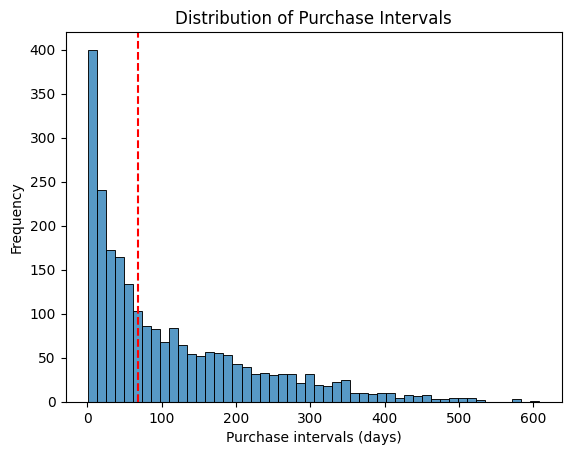

In [31]:
#visualizing daysinterval distribution
sns.histplot(daysinterval_df['difference'], bins = 50)
plt.title('Distribution of Purchase Intervals')
plt.xlabel('Purchase intervals (days)')
plt.ylabel('Frequency')

#calculate cumulative sum
cumulative_sum = daysinterval_df['difference'].value_counts(normalize=True).sort_index().cumsum()

#calculate index at 50%
index_50 = (cumulative_sum>=0.5).idxmax()

#draw reference line of index_50 in visualization
plt.axvline(x=index_50, color='red', linestyle='--', label = f'50% point : {index_50} days')
plt.show()

In [32]:
index_50

68.0

In [ ]:
# it is found that 50 % customer that buys more than once, has maximum of 68 days
#company can hold bonuses to such behavior to retain customer and to encourage similar behavior in other customer